# Notebook Imports and Packages

In [65]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function
## $f(x) = x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
# Generate some data
x_1 = np.linspace(start=-3, stop=3, num=500)

<function matplotlib.pyplot.show(*args, **kw)>

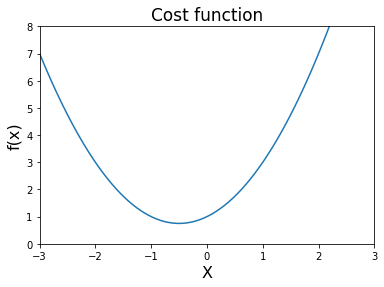

In [4]:
# Plot
plt.xlim(-3, 3)
plt.ylim(0,8)
plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show

# Slope & Derivatives

In [5]:
def df(x):
    return 2*x + 1

<function matplotlib.pyplot.show(*args, **kw)>

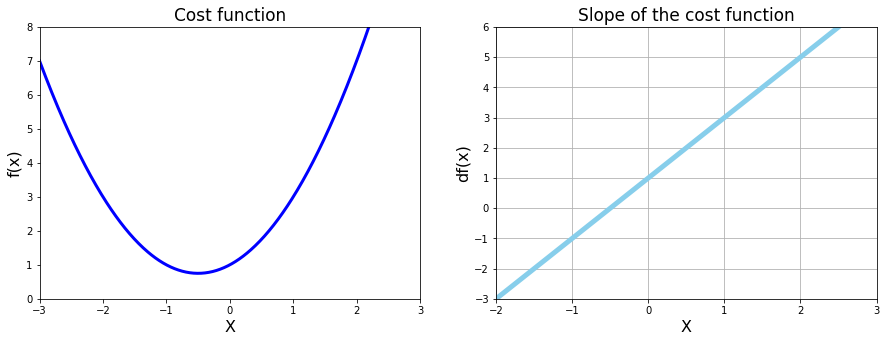

In [6]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# First chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color="blue", linewidth=3)

# Second chart: derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 3)
plt.ylim(-3,6)
plt.grid()

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5)


plt.show

## Python Loops & Gradient Descent

In [7]:
# Python For loop
for i in range(5):
    print('Counting...', i)
print('End of loop')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
End of loop


In [8]:
# Python While loop
counter = 0
while counter < 5:
    print('Counting...', counter)
    counter = counter + 1
print('End of loop')

Counting... 0
Counting... 1
Counting... 2
Counting... 3
Counting... 4
End of loop


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many time:', n)
        break

print('Local minimum occurs at:', new_x)
print('Slope of d(x) value at this point is:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many time: 50
Local minimum occurs at: -0.49996003706460423
Slope of d(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


<function matplotlib.pyplot.show(*args, **kw)>

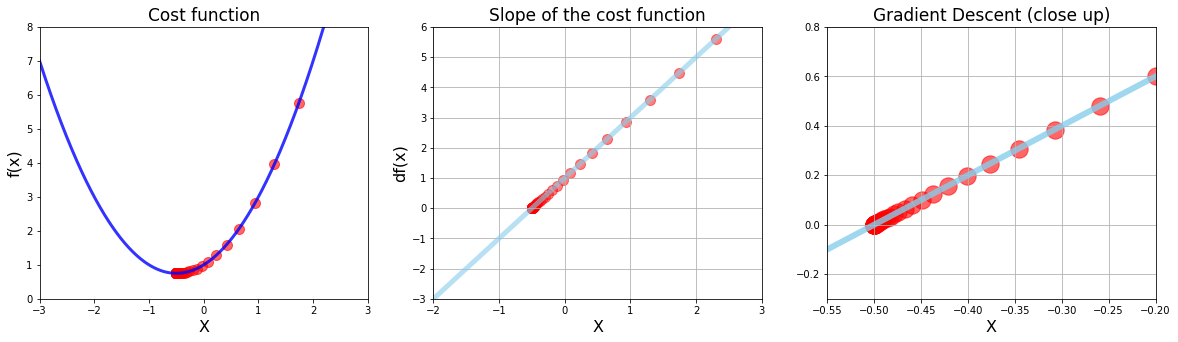

In [10]:
# Superimpose the gradient descent calculations on plot

plt.figure(figsize=[20, 5])

# First chart: Cost function
plt.subplot(1, 3, 1)

plt.xlim(-3, 3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color="blue", linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha=0.6)

# Second chart: Derivative
plt.subplot(1, 3, 2)

plt.xlim(-2, 3)
plt.ylim(-3,6)
plt.grid()

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color='red', s=100, alpha=0.5)

# Third chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.grid()

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('X', fontsize=16)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=300, alpha=0.6)

plt.show

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions
## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Generate some data
x_2 = np.linspace(-2, 2, 1000)

# g(x) function
def g(x):
    return x**4 - 4*x**2 + 5

# derivative of g(x)
def dg(x):
    return 4*x**3 -8*x

<function matplotlib.pyplot.show(*args, **kw)>

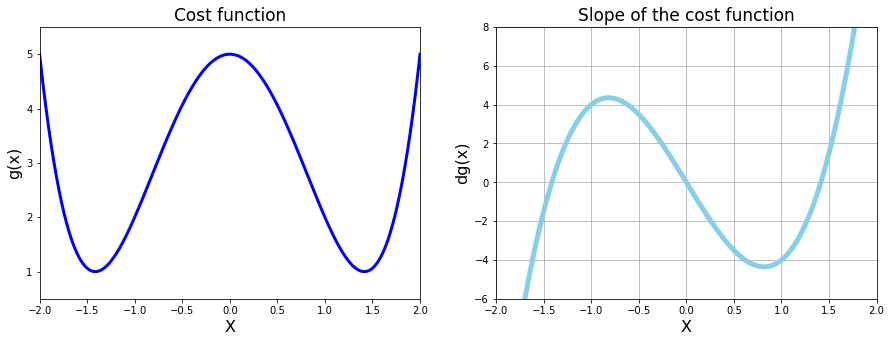

In [12]:
# Plot function and derivative side by side

plt.figure(figsize=[15, 5])

# First chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3)

# Second chart: derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5)


plt.show

## Gradient Descent as a Python Function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            break
            
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.5, 
                                                 multiplier=0.01, precision=0.0001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4137636556157256
Number of steps: 56


In [16]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


<function matplotlib.pyplot.show(*args, **kw)>

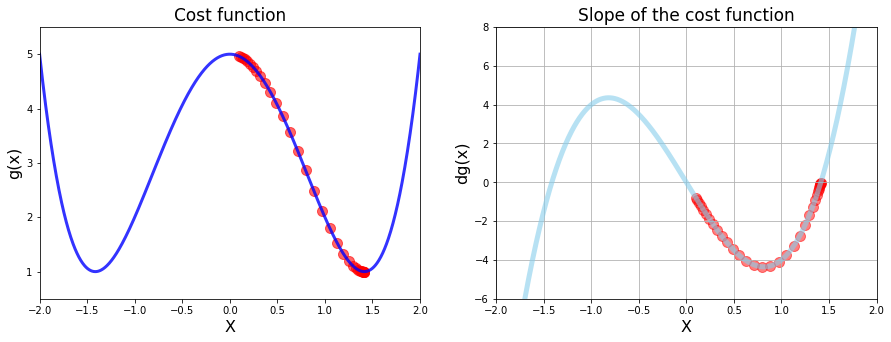

In [17]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# First chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Second chart: derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show

# Example 3 - Divergence, Overflow and Python Tuples
## $$h(x) = x^5 -2x^4 +2$$

In [18]:
# Generate some data, then define function and derivative
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 -2*x**4 + 2

def dh(x):
    return 5*x**4 -8*x**3

Local min occurs at: -1.8398461123332792e+24
Cost at this minimum is: -2.1081790694225687e+121
Number of steps:  72


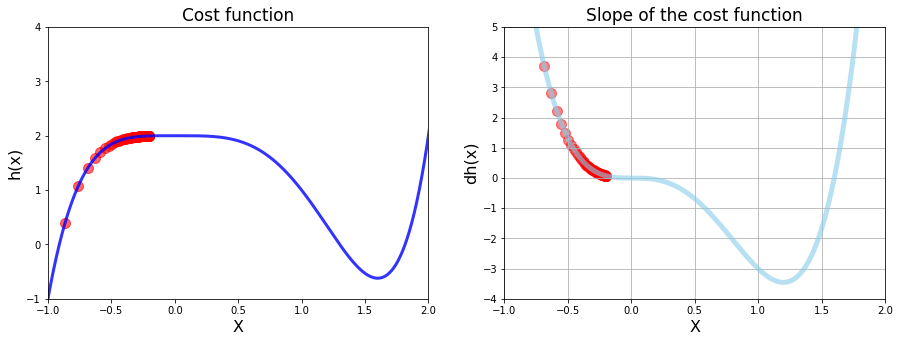

In [19]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter=71)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# First chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-1,2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# Second chart: derivative
plt.subplot(1, 2, 2)

plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.plot(x_3, dh(x_3), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps: ', len(list_x))

In [20]:
# Some system info
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [21]:
# Creating a tuple - tuple packing
breakfeast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I loooove', breakfeast[0])
print('My hotel has no ' + str(unlucky_numbers[1]) + 'th floor' )

# Tuples can be heterogeneous
not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

# Tuples are immutable - they can be changed after they are created

# How to create a tuple with a single value
tuple_with_single_value = 42,
print(tuple_with_single_value)
type(tuple_with_single_value)

# Sequence unpacking
main, side, greens = breakfeast
print('Main course is ', main)

I loooove bacon
My hotel has no 4th floor
(42,)
Main course is  bacon


In [22]:
# Indexing the elements of an unpacked sequence

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

Number of steps:  14


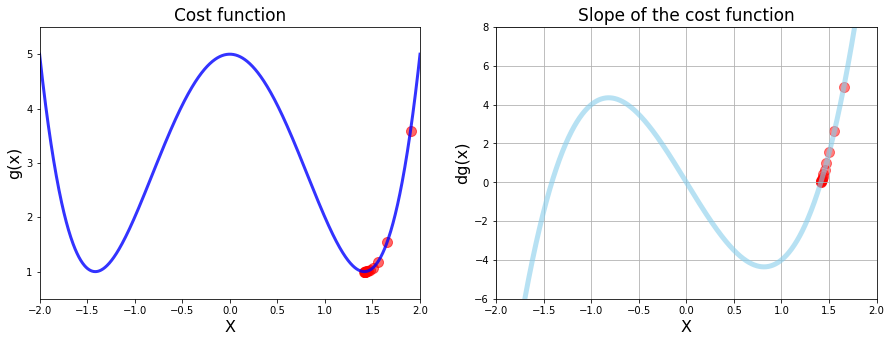

In [23]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.02, max_iter=500)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# First chart: cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color="blue", linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# Second chart: derivative
plt.subplot(1, 2, 2)

plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.plot(x_2, dg(x_2), color="skyblue", linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show

print('Number of steps: ', len(list_x))

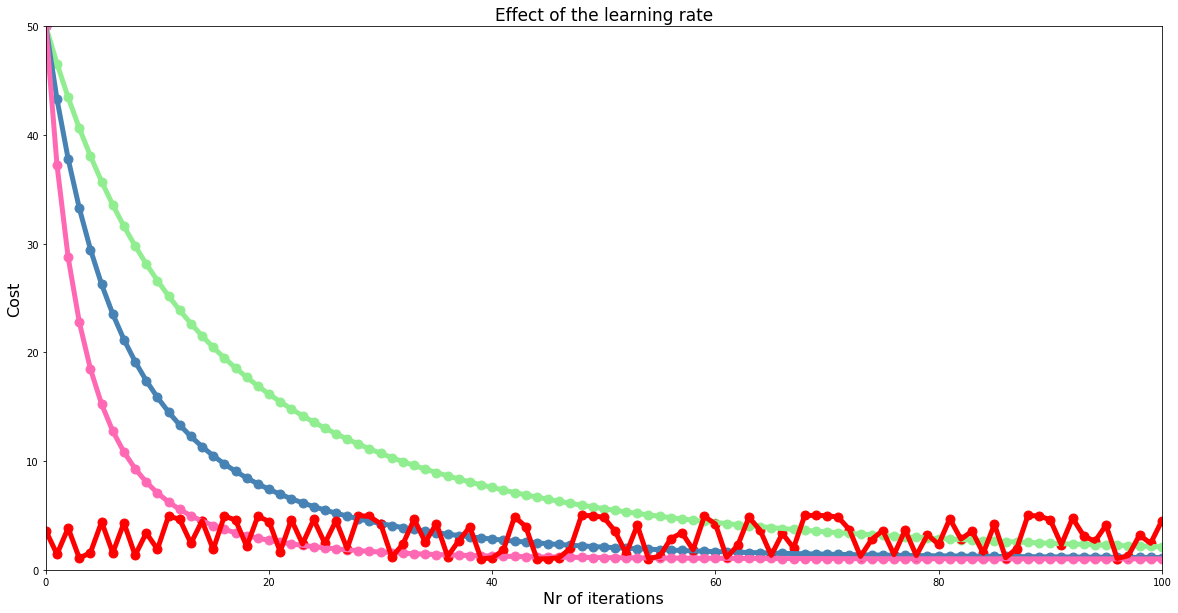

In [24]:
# Run gradient descent 3 times

n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.0005, precision=0.0001, max_iter=n)

mid_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.001, precision=0.0001, max_iter=n)

high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, 
                                                 multiplier=0.002, precision=0.0001, max_iter=n)

# Experiment
insane_gamma = gradient_descent(derivative_func=dg, initial_guess=1.9, 
                                                 multiplier=0.25, precision=0.0001, max_iter=n)



# Plotting reduction in cost for each iteration

plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
insane_values = np.array(insane_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color="lightgreen", linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color="steelblue", linewidth=5)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color="hotpink", linewidth=5)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

# Experiment from above: plotting insane learning rate
plt.plot(iteration_list, g(insane_values), color="red", linewidth=5)
plt.scatter(iteration_list, g(insane_values), color='red', s=80)



plt.show()

# Example 4 - Data Viz with 3D Chart
## Minimise $$f(x, y) = \frac{1}{3^{-x^2 -y^2} + 1}$$
Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 -y^2}$

In [25]:
# Define the function using the second definition

def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [26]:
# Generate some x and y data

x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of x_4 array:', x_4.shape)

# To plot a 3D chart, the plot_surface method below expect 2D-array inputs
x_4, y_4= np.meshgrid(x_4, y_4)

print('Shape of array after meshgrid:', x_4.shape)

Shape of x_4 array: (200,)
Shape of array after meshgrid: (200, 200)


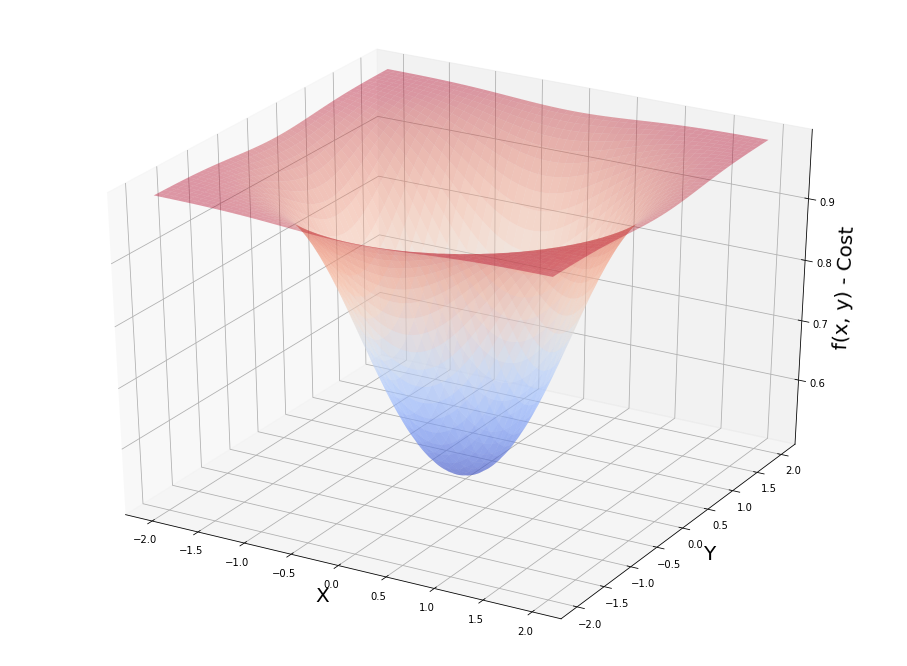

In [27]:
# Generating 3D plot

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)

plt.show()

In [28]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range (max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y =  fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Value in gradients array:\n', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

NameError: name 'fpx' is not defined

## Partial Derivatives and Symbolic Computation
## $$\frac{\partial f}{\partial x} = \frac{2x \ln{3} \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 -y^2} + 1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln{3} \cdot 3^{-x^2 -y^2}}{\left( 3^{-x^2 -y^2} + 1 \right)^2}$$

In [29]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), a))

print('Value of f(x, y) at x=1.8, y=1.0 is: ', 
      f(a,b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x at the same point: ', 
      diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x=1.8, y=1.0 is:  0.990604794032582
Value of partial derivative wrt x at the same point:  0.0368089716197505


## Batch Gradient Descent with SymPy

In [30]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range (max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Value in gradients array:\n', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Value in gradients array:
 [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


## Batch Gradient Descent without SymPy

In [31]:
# Partial derivative functions - Example 4

def fpx(x, y):
    r = 3**(-x**2 -y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 -y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [32]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range (max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y =  fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Value in gradients array:\n', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Value in gradients array:
 [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


## Graphing 3D Gradient Descent & Advanced Numpy Arrays

In [33]:
# Advances Numpy Arrays Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'],['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]:', hs_band[0])
print('hs_band[1][0]:', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]: ['Black Thought' 'MC']
hs_band[1][0]: Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles... ['MC' 'Drums' 'Guitar' 'MC']


In [34]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range (max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y =  fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    # values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    # Line below accomplishes the same as line above (commented out):
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
# Results
print('Value in gradients array:\n', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Value in gradients array:
 [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


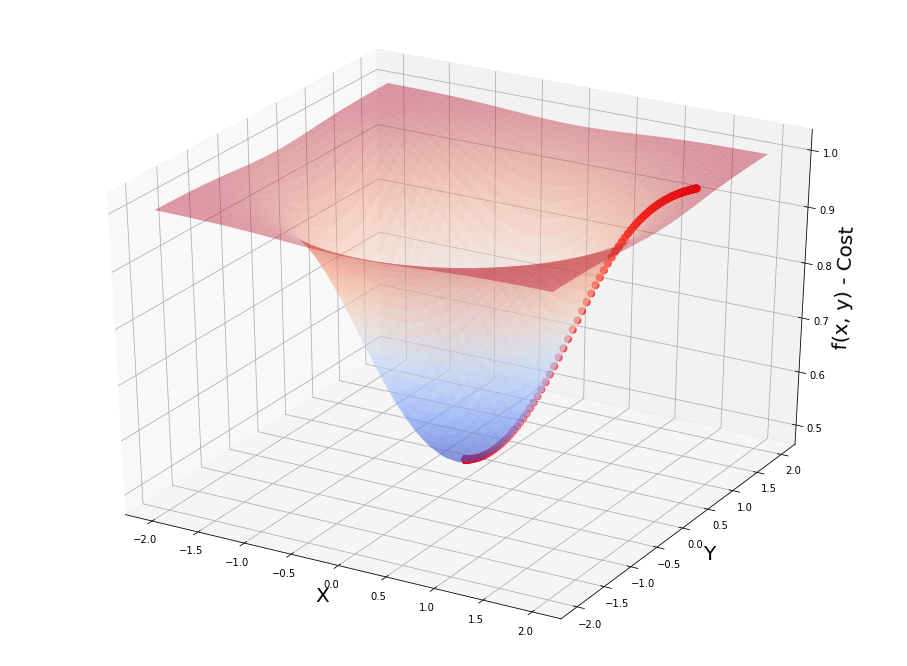

In [35]:
# Generating 3D plot with gradient descent superimposed

fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], f(values_array[:, 0], values_array[:, 1]), 
          s=50, color='red')

plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error (MSE): a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [42]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose() # first way to add a dimension
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.9, 9.4, 8.2]).reshape(7, 1) # second way

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [46]:
# Quick Linear regression
reg = LinearRegression()
reg.fit(x_5, y_5)

print('Theta 0:', reg.intercept_[0])
print('Theta 1:', reg.coef_[0][0])

Theta 0: 0.8969389571098052
Theta 1: 1.2423029008720412


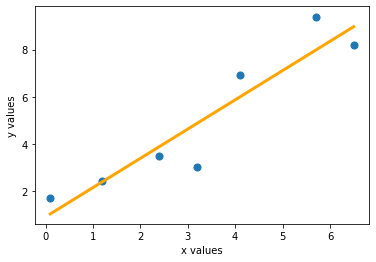

In [50]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, reg.predict(x_5), color='orange', linewidth=3 )
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [53]:
# y_hat = theta0 + theta1*x
y_hat = 0.8969389571098052 + 1.2423029008720412 * x_5

print('Estimated values y_hat are: \n', y_hat)
print('In comparison, the actual y values are: \n', y_5)

Estimated values y_hat are: 
 [[1.02116925]
 [2.38770244]
 [3.87846592]
 [4.87230824]
 [5.99038085]
 [7.97806549]
 [8.97190781]]
In comparison, the actual y values are: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.9]
 [9.4]
 [8.2]]


In [54]:
# Challenge: write a python function mse(y, y_hat) that returns the MSE.
# Call the mse(y, y_hat) function and print out the MSE for the y_hat calculated above.

In [62]:
def mse(y, y_hat):
    # mse_calc = 1/7 * sum((y - y_hat)**2)
    # mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc
    

In [66]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is:', mean_squared_error(y_5, y_hat))
print('MSE regression is:', mean_squared_error(y_5, reg.predict(x_5)))

Manually calculated MSE is: [1.07926906]
MSE regression using manual calc is: 1.0792690616022171
MSE regression is: 1.0792690616022171


## 3D Plot for the MSE Cost Function

### Make data for thetas

In [91]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)
# plot_t0

### Calculate the MSE using nested for loops

In [92]:
plot_cost = np.zeros((nr_thetas, nr_thetas))
# plot_cost

for i in range (nr_thetas):
    for j in range (nr_thetas):
        # print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)
        
# plot_cost.shape 
# plot_cost
print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [80]:
# Nested loops practice

for i in range(3):
    for j in range(3):
        # print('Hello')
        print(f'Value of i is {i} and value of j is {j}') # f string interpolation

Value of i is 0 and value of j is 0
Value of i is 0 and value of j is 1
Value of i is 0 and value of j is 2
Value of i is 1 and value of j is 0
Value of i is 1 and value of j is 1
Value of i is 1 and value of j is 2
Value of i is 2 and value of j is 0
Value of i is 2 and value of j is 1
Value of i is 2 and value of j is 2


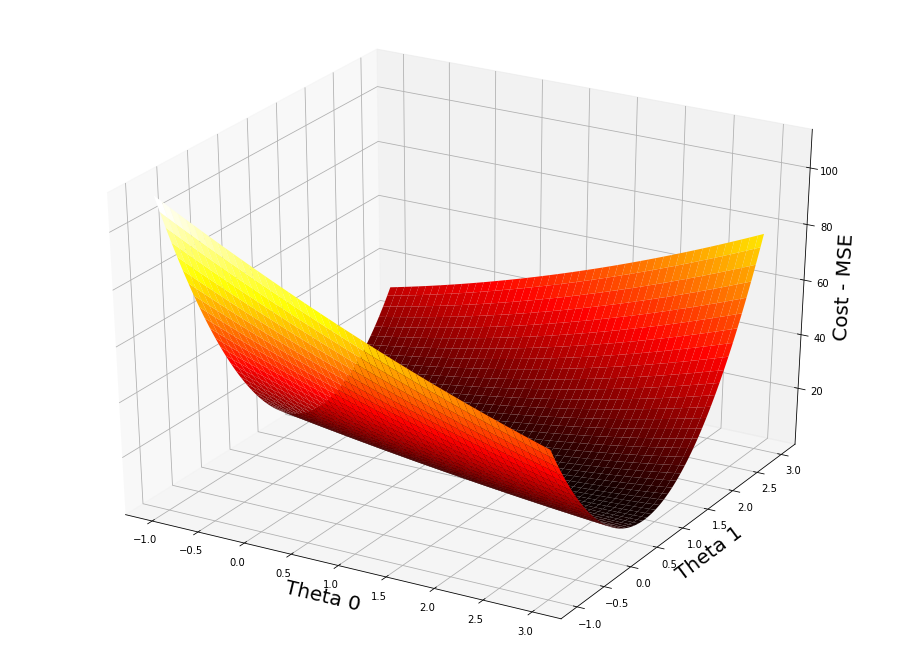

In [94]:
# Plotting the MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [100]:
print('Min value of plot_cost:', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), shape=plot_cost.shape)
print('Min occurs at (i, j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[112][93]:',plot_t0[112][93])
print('Min MSE for Theta 1 at plot_t1[112][93]:',plot_t1[112][93])

Min value of plot_cost: 1.079641098529258
Min occurs at (i, j): (112, 93)
Min MSE for Theta 0 at plot_t0[112][93]: 0.8693467336683418
Min MSE for Theta 1 at plot_t1[112][93]: 1.2512562814070352


## Partial Derivatives of SME w.r.t. $\theta_0$ and  $\theta_1$


## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=n}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=n}^{n} \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)}\big)$$

## MSE & Gradient Descent

In [103]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: creat theta0_slope and theta1_slope to hold slope values from partial derivatives
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    # return np.array([theta0_slope[0], theta1_slope[0]])
    # return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [109]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)


for i in range (1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.9024747624664874
Min occurs at Theta 1: 1.2411029384417833
MSE is: [1.0792781]


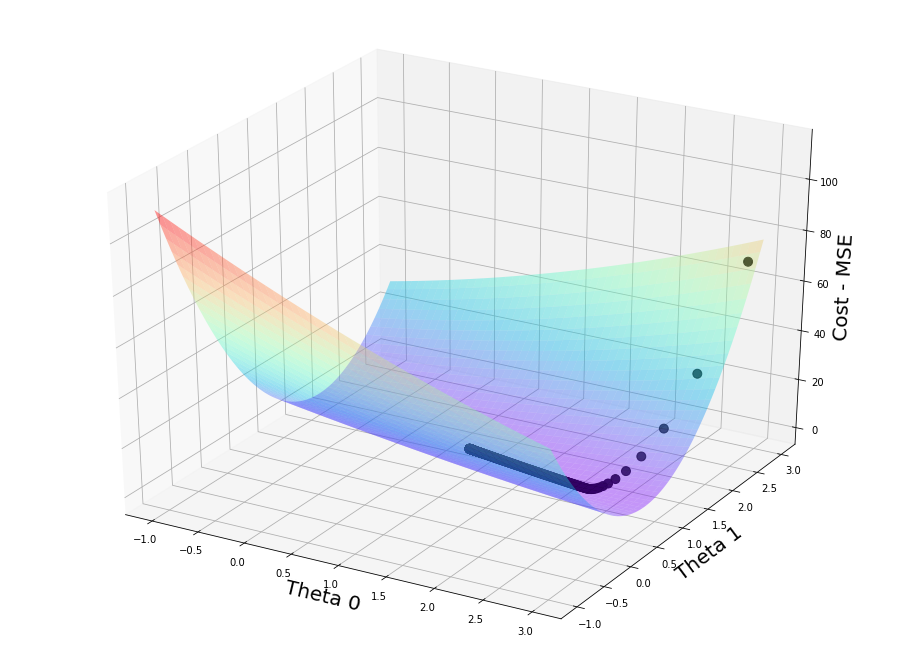

In [112]:
# Plotting the MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()